In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('D:/data_reduce_filled.csv')

In [3]:
pollution = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]',
    'Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]',

    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
    'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]',

    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',

    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]',

    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]',

    'Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]',
    'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]',

    'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]',

    'Energy intensity level of primary energy (MJ/$2017 PPP GDP) [EG.EGY.PRIM.PP.KD]',
    'Carbon intensity of electricity (gCO2/kWh)'
]

In [4]:
economics = [
    'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
    'Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]',
    'Exports of goods and services (current US$) [NE.EXP.GNFS.CD]',
    'Imports of goods and services (current US$) [NE.IMP.GNFS.CD]',
    'Final consumption expenditure (current US$) [NE.CON.TOTL.CD]',
    'GDP, PPP (constant 2017 international $) [NY.GDP.MKTP.PP.KD]',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
    'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
    'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]',
    'Population, total [SP.POP.TOTL]',
    'Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]'
]

In [16]:
#pca for economic data
x = data[economics]

In [17]:
x_pca=StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pca_econ =pca.fit_transform(x_pca)

In [18]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.47640678 0.17298735]


In [19]:
principal_econ_df = pd.DataFrame(data = pca_econ
             , columns = ['principal component 1', 'principal component 2'])

<Figure size 640x480 with 0 Axes>

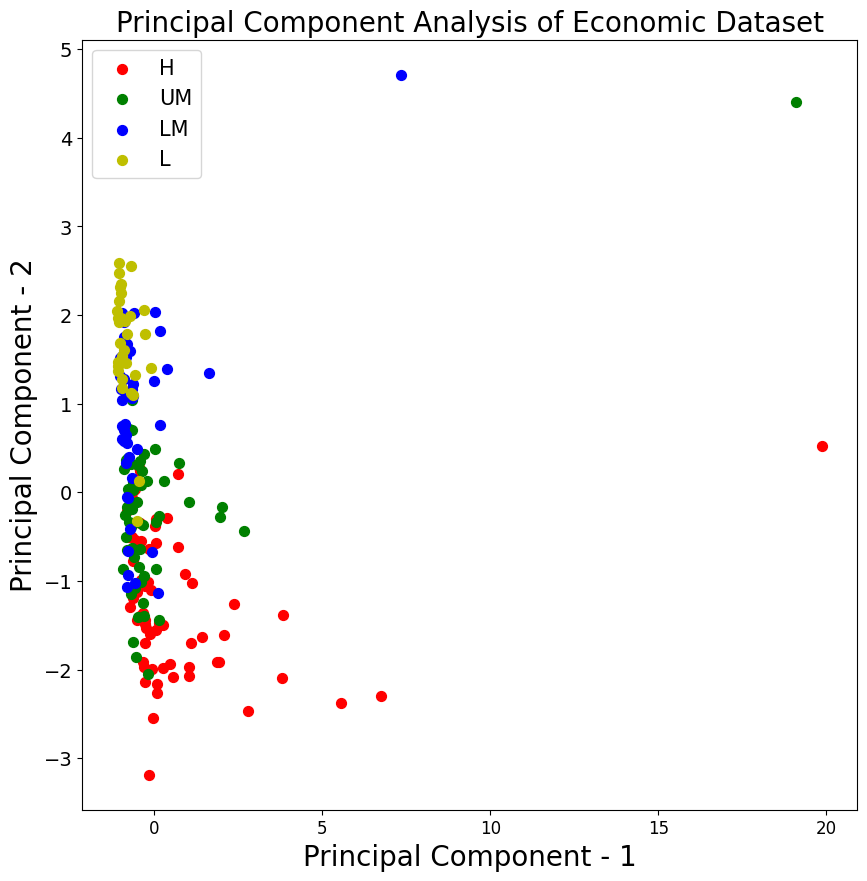

In [20]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Economic Dataset",fontsize=20)
targets = ['H', 'UM','LM','L']
colors = ['r', 'g','b','y']
for target, color in zip(targets,colors):
    indicesToKeep = data['Income Group'] == target
    plt.scatter(principal_econ_df.loc[indicesToKeep, 'principal component 1']
               , principal_econ_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


In [10]:
#pca for pollution data
y = data[pollution]

In [11]:
y_pca=StandardScaler().fit_transform(y)

pca_y = PCA(n_components=2)
pca_pollution =pca_y.fit_transform(y_pca)

print('Explained variation per principal component: {}'.format(pca_y.explained_variance_ratio_))


Explained variation per principal component: [0.40114049 0.29519971]


In [12]:
principal_pollution_df = pd.DataFrame(data = pca_pollution
             , columns = ['principal component 1', 'principal component 2'])

<Figure size 640x480 with 0 Axes>

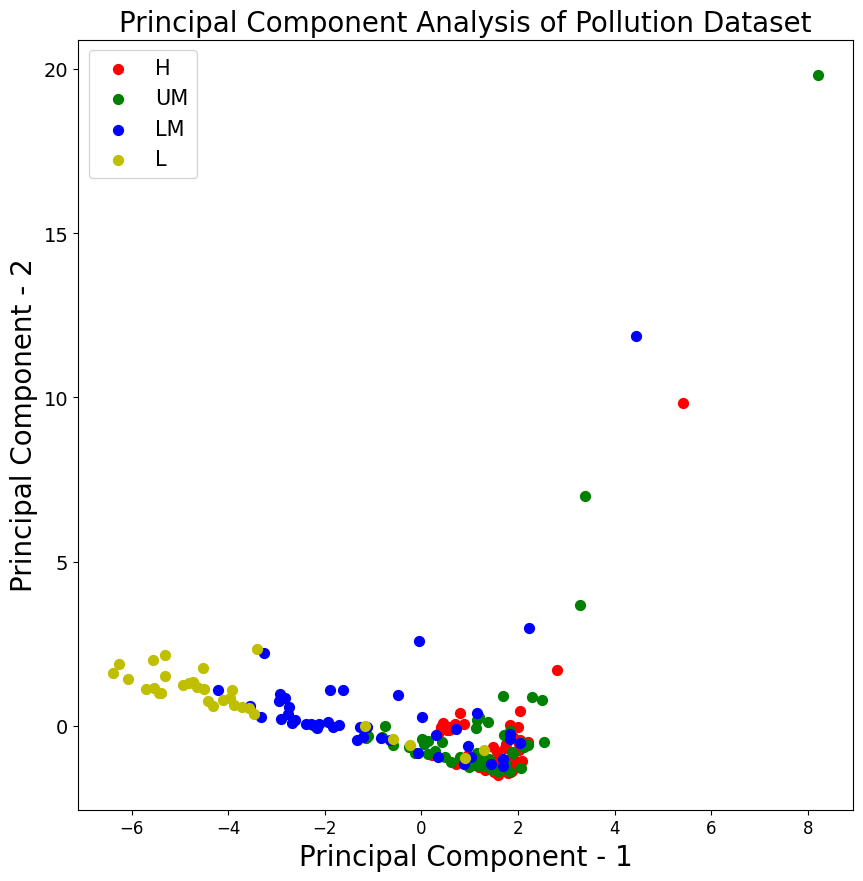

In [14]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Pollution Dataset",fontsize=20)
targets = ['H', 'UM','LM','L']
colors = ['r', 'g','b','y']
for target, color in zip(targets,colors):
    indicesToKeep = data['Income Group'] == target
    plt.scatter(principal_pollution_df.loc[indicesToKeep, 'principal component 1']
               , principal_pollution_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


In [21]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

In [29]:
#ridge with pca
x_train, x_test, y_train, y_test = train_test_split(x, principal_pollution_df,test_size = .2, random_state=0)

In [30]:
ridge_pca=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}
ridge_reg_pca=ms.GridSearchCV(ridge_pca, param_grid=parameters,return_train_score=True, scoring='neg_mean_squared_error', cv=5)
ridge_reg_pca.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg_pca.best_params_)

The best value of Alpha is:  {'alpha': 100}


In [31]:
ridge_mod_pca=Ridge(alpha=100)
ridge_mod_pca.fit(x_train,y_train)
y_pred_train_pca=ridge_mod_pca.predict(x_train)
y_pred_test_pca=ridge_mod_pca.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train, y_pred_train_pca))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_pred_test_pca))))


Root Mean Square Error train = 0.9168292749237333
Root Mean Square Error test = 1.0754528034923223


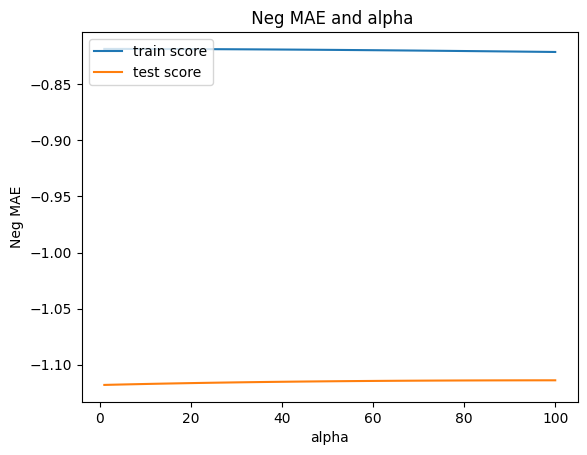

In [32]:
cv_result = pd.DataFrame(ridge_reg_pca.cv_results_)
cv_result = cv_result[cv_result['param_alpha']<=100]

cv_result['param_alpha'] = cv_result['param_alpha'].astype('int32')

plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MSE')
plt.title(" Neg MSE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [33]:
#lasso with pca
lasso_pca=Lasso()
lasso_reg_pca=ms.GridSearchCV(lasso_pca, param_grid=parameters,return_train_score=True,scoring='neg_mean_squared_error', cv=5)
lasso_reg_pca.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg_pca.best_params_)


The best value of Alpha is:  {'alpha': 1}


In [34]:
lasso_mod_pca=Lasso(alpha=1)
lasso_mod_pca.fit(x_train,y_train)
y_lasso_train_pca=lasso_mod_pca.predict(x_train)
y_lasso_test_pca=lasso_mod_pca.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(metrics.mean_squared_error(y_train, y_lasso_train_pca))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_lasso_test_pca))))


Root Mean Square Error train = 0.984128802825699
Root Mean Square Error test = 0.9802906738083541


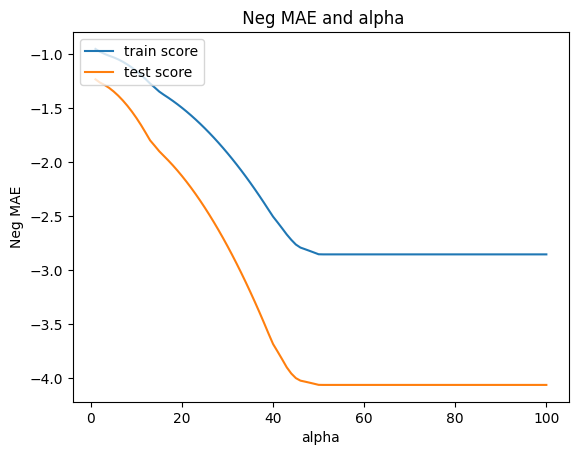

In [35]:
cv_result = pd.DataFrame(lasso_reg_pca.cv_results_)
cv_result = cv_result[cv_result['param_alpha']<=100]

cv_result['param_alpha'] = cv_result['param_alpha'].astype('int32')

plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg MSE')
plt.title(" Neg MSE and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [37]:
coef = lasso_mod_pca.coef_

coefs = pd.Series(coef[1], index = x.columns)

print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")


Lasso kept  9 important features and dropped the other  2  features


In [38]:
coef = lasso_mod_pca.coef_

coefs = pd.Series(coef[0], index = x.columns)

print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")


Lasso kept  8 important features and dropped the other  3  features
